## K Means

In [2]:
#read the data
import pandas as pd

kmdt = pd.read_csv('Datasets/numeric_clustering_data.csv')
kmdt.head()

,Age,duration,Min_balance,spend_per_month
0,56,261,42058,24994
1,23,148,1580,22171
2,37,226,64919,6094
3,37,135,1151,15646
4,56,307,42359,26907


In [3]:
#describe,glance the data
print(kmdt.shape)
kmdt.describe()

(41188, 4)


,Age,duration,Min_balance,spend_per_month
count,41188.000000,41188.000000,41188.000000,41188.000000
mean,36.477882,172.750097,28390.154001,22757.040279
std,9.609824,204.509468,27249.444855,10722.434996
min,17.000000,0.000000,0.000000,5004.000000
25%,30.000000,70.000000,1973.750000,14954.750000
50%,35.000000,114.000000,3977.000000,20250.000000
75%,42.000000,180.000000,55019.000000,27364.250000
max,98.000000,4918.000000,69998.000000,49996.000000


In [4]:
#taking only values which I require and exclude variables like weight, date etc
X=kmdt.iloc[:, [0,1,2,3]].values
X

array([[   56,   261, 42058, 24994],
       [   23,   148,  1580, 22171],
       [   37,   226, 64919,  6094],
       ...,
       [   56,   189, 57980, 17719],
       [   42,    80,  1022, 13332],
       [   36,   107,  2895, 19852]], dtype=int64)

In [5]:
from sklearn.cluster import KMeans

## Find out number clusters exist in the data
## Developing 15 models from 1 to 15 and finding distacning between centroids and putting it in a table
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

In [6]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
#Draw a denndrogram 
linkage_data = linkage(kmdt, method='ward', metric='euclidean')
#ward method tries to combine
dendrogram(linkage_data)
plt.show()

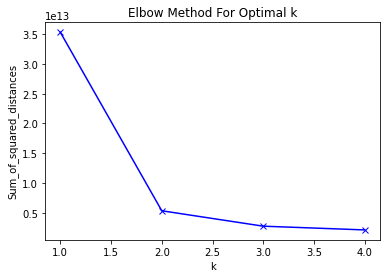

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#Find number of K 
## Find out number clusters exist in the data
Sum_of_squared_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
#Defjning k=2 from dendogram or elbow curve
model = KMeans(n_clusters=2, random_state=42) 
dt_kmeans = model.fit(X)

In [9]:
#creates another column for original data
dt_kmeans.labels_
kmdt['cluster_labels'] = dt_kmeans.labels_
kmdt.head()

,Age,duration,Min_balance,spend_per_month,cluster_labels
0,56,261,42058,24994,1
1,23,148,1580,22171,0
2,37,226,64919,6094,1
3,37,135,1151,15646,0
4,56,307,42359,26907,1


In [13]:
from sklearn.metrics import silhouette_score

In [14]:
## Silhoute coefficient for clusters
#Silhoutte score says how good the model is

score = silhouette_score(X, model.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.774


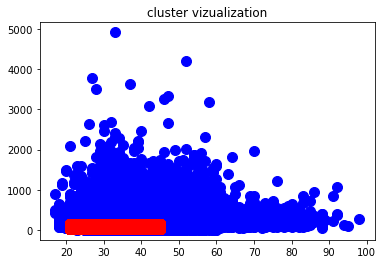

In [16]:
# Plot the cluster

plt.title("cluster vizualization")

y_kmeans = model.fit_predict(X)
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')


In [ ]:
# Deep dive into clusters
#0 and 1 are two clusters

print(kmdt.groupby('cluster_labels').describe().unstack(1))

In [ ]:
## Write output in csv
kmdt.to_csv('kmeans_output.csv')

## Kmeans ++

In [17]:
kmdt.head()

## Drop the cluster labels by Kmeans

,Age,duration,Min_balance,spend_per_month,cluster_labels
0,56,261,42058,24994,1
1,23,148,1580,22171,0
2,37,226,64919,6094,1
3,37,135,1151,15646,0
4,56,307,42359,26907,1


In [18]:
kmeans = KMeans(n_clusters=2, init ='k-means++',  n_init=10,random_state=0 )

y_kmeans = kmeans.fit_predict(X)

from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.774


Silhouetter Score: 0.774


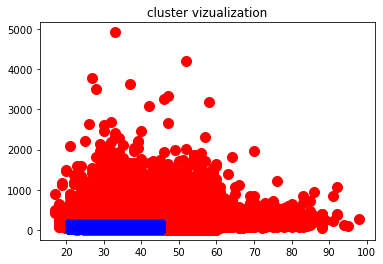

In [19]:
## Plot the clusters

y_kmeans = kmeans.fit_predict(X)
y_kmeans

from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)


plt.title("cluster vizualization")

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')

In [20]:
## Deep dive into clusters

kmdt['kmeans_plus_pred'] = y_kmeans
print(kmdt.groupby('kmeans_plus_pred').describe().unstack(1))

                       kmeans_plus_pred
Age             count  0                   20475.000000
                       1                   20713.000000
                mean   0                      39.977680
                       1                      33.018298
                std    0                      10.429463
                                               ...     
cluster_labels  50%    1                       0.000000
                75%    0                       1.000000
                       1                       0.000000
                max    0                       1.000000
                       1                       0.000000
Length: 80, dtype: float64


## Kmodes

In [24]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [25]:
#works on categorical data 
from kmodes.kmodes import KModes
import pandas as pd
data = pd.read_csv('Datasets/kmod.csv')
data.head()

,job,marital,education,housing,loan
0,housemaid,married,basic.4y,no,no
1,services,married,high.school,no,no
2,services,married,high.school,yes,no
3,admin.,married,basic.6y,no,no
4,services,married,high.school,no,yes


In [26]:
print(data.shape)
data.describe()
#gives the count, unique type metrics from the data
#count for job is 38245 and there are 11 classes in job(types) and the top or most occured value is admin and the frequencey of admin is 9937

(38245, 5)


,job,marital,education,housing,loan
count,38245,38245,38245,38245,38245
unique,11,3,7,2,2
top,admin.,married,university.degree,yes,no
freq,9937,23183,11821,20578,32286


In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = data.apply(le.fit_transform)
bank_cust.head()
#unqiue of gender is 2, it will give number of classes present in the categorica value
#if the data in clutering is categorical(in linear and logistic we use dummy variables), here we use label encoder which gives the cateogorical data 1 or 2
#we should convert this again to a factor
#in dummy varaibles only 0 or 2, but in label encoding it depends on the number of classes

,job,marital,education,housing,loan
0,3,1,0,0,0
1,7,1,3,0,0
2,7,1,3,1,0
3,0,1,1,0,0
4,7,1,3,0,1


In [ ]:
For kmod two types of initializations methods are there 'cao' and 'huang'

In [28]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)
#find out best possible k in Cao or Huang

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 93420.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 76658.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 69931.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 64835.0


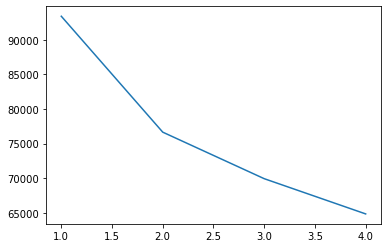

In [29]:
import numpy as np
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)


In [30]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 76658.0


In [31]:
cost_huang = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost_huang.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 93420.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9023, cost: 76201.0
Run 1, iteration: 2/100, moves: 0, cost: 76201.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6956, cost: 68841.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5032, cost: 65220.0


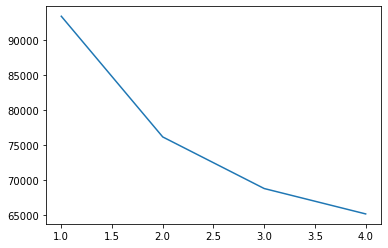

In [32]:
import numpy as np
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost_huang)

In [33]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)
fitClusters_cao

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 76658.0


array([0, 1, 0, ..., 0, 0, 0], dtype=uint16)

In [34]:
km_huang = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)
fitClusters_huang

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8077, cost: 70209.0


array([0, 0, 0, ..., 1, 0, 0], dtype=uint16)

In [35]:
bank_cust['fitClusters_huang'] = fitClusters_huang
bank_cust['fitClusters_cao'] = fitClusters_cao
bank_cust.head()

,job,marital,education,housing,loan,fitClusters_huang,fitClusters_cao
0,3,1,0,0,0,0,0
1,7,1,3,0,0,0,1
2,7,1,3,1,0,0,0
3,0,1,1,0,0,1,0
4,7,1,3,0,1,0,1


In [36]:
X = bank_cust.iloc[:, [0,1,2,3,4]].values

In [37]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=2): {silhouette_score(X, fitClusters_cao)}')

Silhouette Score(n=2): 0.03452979602968806


In [38]:
print(f'Silhouette Score(n=3): {silhouette_score(X, fitClusters_huang)}')

Silhouette Score(n=3): 0.2108559595332345


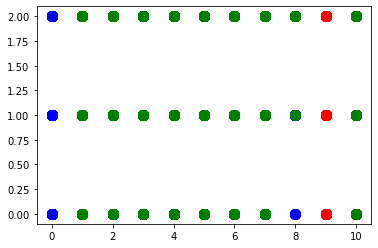

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X[fitClusters_huang==0, 0], X[fitClusters_huang==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[fitClusters_huang==1, 0], X[fitClusters_huang==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[fitClusters_huang==2, 0], X[fitClusters_huang==2, 1], s=100, c='green', label ='Cluster 3')

In [40]:
km_huang_two = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang_two = km_huang_two.fit_predict(bank_cust)
fitClusters_huang_two
print(f'Silhouette Score(n=3): {silhouette_score(X, fitClusters_huang_two)}')

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2707, cost: 97883.0
Silhouette Score(n=3): 0.006174214344369451


In [41]:
bank_cust['fitClusters_huang_two'] = fitClusters_huang_two
bank_cust.drop (['fitClusters_huang','fitClusters_cao'],axis = 1,inplace=True)
bank_cust.to_csv('clustering_labels.csv')

## DBSCAN 

In [43]:
dbscan_input_data = pd.read_csv('Datasets/dbscan_input_data.csv')
dbscan_input_data.head()
#used when the dataset has numeric as well as categorical data

,Cust_ID,Age,duration,Min_balance,spend_per_month,job,marital,education
0,1001,56,261,42058,24994,housemaid,married,basic.4y
1,1002,23,148,1580,22171,services,married,high.school
2,1003,37,226,64919,6094,services,married,high.school
3,1004,37,135,1151,15646,admin.,married,basic.6y
4,1005,56,307,42359,26907,services,married,high.school


In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = dbscan_input_data[['job','marital','education']].apply(le.fit_transform)
#Apply Label encoding for categorical data
numeric_data = dbscan_input_data[['Age','duration','Min_balance','spend_per_month']]
final_data = pd.concat([numeric_data,bank_cust],axis =1)
final_data.head()

,Age,duration,Min_balance,spend_per_month,job,marital,education
0,56,261,42058,24994,3,1,0
1,23,148,1580,22171,7,1,3
2,37,226,64919,6094,7,1,3
3,37,135,1151,15646,0,1,1
4,56,307,42359,26907,7,1,3


In [45]:
from sklearn.preprocessing import StandardScaler
X = final_data.iloc[:, [0,1,2,3,4,5,6]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Scaling th data to reduce the variance


In [46]:
from sklearn.preprocessing import normalize
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
X_normalized.head()
#For any numeric data, these steps are important

,0,1,2,3,4,5,6
0,0.733686,0.153273,0.177755,0.074109,-0.065434,-0.099343,-0.622071
1,-0.702191,-0.060261,-0.491445,-0.027501,0.469216,-0.138940,-0.146814
2,0.026982,0.112430,0.579581,-0.673333,0.407984,-0.120808,-0.127655
3,0.030355,-0.089852,-0.488397,-0.323420,-0.500894,-0.135909,-0.615229
4,0.831757,0.264381,0.205976,0.156053,0.380339,-0.112622,-0.119005


In [47]:
from sklearn.cluster import DBSCAN

# eps: Two points are considered neighbors if the distance between the two points is below the threshold epsilon.
# min_samples: The minimum number of neighbors a given point should have in order to be classified as a core point.

db_default = DBSCAN(eps = 0.3, min_samples = 3).fit(X_normalized)
labels = db_default.labels_
labels
#here not giving value of k, hence we give value of eps
#eps=calculates gradient distance, upto 0.3 treat them as neighbours 

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

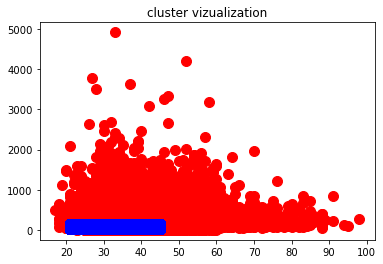

In [48]:
plt.title("cluster vizualization")

plt.scatter(X[labels==0, 0], X[labels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=100, c='blue', label ='Cluster 2')

In [49]:
dbscan_input_data['dbscan_labels'] = labels
dbscan_input_data.head()

,Cust_ID,Age,duration,Min_balance,spend_per_month,job,marital,education,dbscan_labels
0,1001,56,261,42058,24994,housemaid,married,basic.4y,0
1,1002,23,148,1580,22171,services,married,high.school,1
2,1003,37,226,64919,6094,services,married,high.school,0
3,1004,37,135,1151,15646,admin.,married,basic.6y,1
4,1005,56,307,42359,26907,services,married,high.school,0


In [50]:
dbscan_input_data.to_csv('dbscan_cluster_output.csv')